In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
measurements = np.array([10.44, 10.52, 10.42, 10.66, 10.53, 10.42, 10.55, 10.57, 10.56, 10.47, 10.65, 10.54, 10.44, 10.28, 10.61, 10.50, 10.50, 10.59, 10.58, 10.56, 10.59, 10.58, 10.51, 10.30,
10.56, 10.49, 10.48, 10.35, 10.45, 10.54, 10.64, 10.49, 10.54, 10.49, 10.36, 10.46, 10.46, 10.49, 10.61, 10.58, 10.48, 10.47, 10.57, 10.56, 10.43, 10.43, 10.54, 10.58,
10.49, 10.59, 10.54, 10.44, 10.53, 10.39, 10.64, 10.70, 10.46, 10.40, 10.56, 10.49, 10.74, 10.50, 10.57, 10.50, 10.43, 10.52, 10.32, 10.65, 10.52, 10.72, 10.55, 10.43,
10.56, 10.41, 10.37, 10.53, 10.46, 10.50, 10.51, 10.44, 10.44, 10.49, 10.62, 10.35, 10.56, 10.53, 10.61, 10.47, 10.54, 10.53, 10.45, 10.62, 10.62, 10.57, 10.66, 10.56, 10.37, 10.44, 10.38, 10.45
])
n = len(measurements)
mu_0 = 10
mean = np.mean(measurements)
std = measurements.std()
t_c = (mean - mu_0)*np.sqrt(n) / std 
t975 = stats.norm.ppf(0.975)
p_value = 1 - stats.norm.cdf(t_c)
if p_value < 0.05:
	print("Reject H0")
else:
	print("Accept H0")
err = t975*(std)/np.sqrt(n)
interval = [mean - err, mean + err]
print("interval:", interval)

Reject H0
interval: [10.493841041559012, 10.528958958440992]


Shapiro-Wilk: ShapiroResult(statistic=0.994091272354126, pvalue=0.9443349838256836)
   count     mean       std    min    25%     50%    75%    max
0  100.0  10.5114  0.090039  10.28  10.45  10.515  10.57  10.74


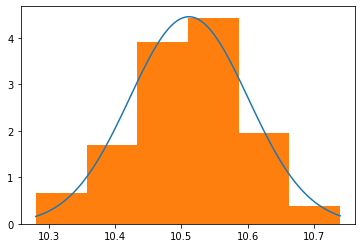

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

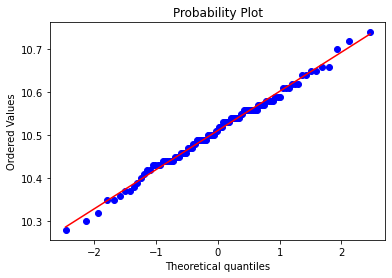

In [3]:
hyp_method = stats.shapiro(measurements)
print("Shapiro-Wilk:", hyp_method)
S = pd.Series(measurements)
print(S.describe().to_frame().T)
x = np.linspace(S.min(), S.max(), 100)
plt.plot(x, stats.norm.pdf(x, mean, std))
plt.hist(measurements, density=True, bins=6)
plt.show()
stats.probplot(measurements, dist="norm", plot=plt)

In [4]:
stats.t.ppf(1-0.01, 25-1)
[3.72-(2.49*1.93/5), np.inf]

[2.7588600000000003, inf]

In [5]:
n=50
h0 = 0.5
p = 18/n
alpha = 0.05
est = (p-h0)/np.sqrt(h0*(1-h0)/n)
percentil = stats.norm.ppf(alpha)
print("est:", est)
print("percentil:", percentil)
if est < percentil:
	print("Reject H0")
else:
	print("Accept H0")
p_value = stats.norm.cdf(est)
print("p_value:", p_value)
if p_value < alpha:
	print("Reject H0")
else:
	print("Accept H0")

interval = [np.inf,p+stats.norm.ppf(1-alpha)*np.sqrt(h0*(1-h0)/n)]
print("interval:", interval)

est: -1.9798989873223334
percentil: -1.6448536269514729
Reject H0
p_value: 0.023857440118675563
Reject H0
interval: [inf, 0.4763087153676674]


In [6]:
stats.norm.ppf(1-0.05/2)
ps = stats.norm.cdf(-2.645), 1 - stats.norm.cdf(-2.645)
2*min(ps)

err = 1.96*np.sqrt(.36*(1-.36)/300)
interval = 0.63+np.array([-err, err])
interval

array([0.57568289, 0.68431711])

In [7]:
def var_intervals(n:float, S2:float, chi2_ls:float, chi2_li:float) -> tuple[float, float]:
	return ((n-1)*S2)/(chi2_ls), ((n-1)*S2)/(chi2_li)

def std_intervals(interval: tuple) -> tuple[float, float]:
	return interval[0]**0.5, interval[1]**0.5

n = 18
sigma2 = 0.36
alpha = 0.01
chi2_ls = stats.chi2.ppf(1-alpha/2, n-1)
chi2_li = stats.chi2.ppf(alpha/2, n-1)
interval = var_intervals(n, sigma2, chi2_ls, chi2_li)
print("interval:", interval)
interval = std_intervals(interval)
print("interval:", interval)


interval: (0.17133994663785765, 1.0742086690695036)
interval: (0.41393229716688895, 1.0364403837507992)


In [8]:
from tests import test_var_chi2
1-stats.chi2.cdf(36.25, 29)
test_var_chi2(0.0005, 30, 0.0004, 'greater', 0.95)

Chi-squared test for variance:
Statistics=36.250, p-value=0.166
Sample looks Gaussian (fail to reject H0)


In [43]:
nx = 161
gx = 19
px = gx/nx
ny = 95
gy = 22
py = gy/ny
alpha = 0.01
omega0 = 0
pc = (nx*px + ny*py)/(nx + ny)
est = ((px-py)-omega0)/np.sqrt(pc*(1-pc)*(1/nx+1/ny))
print("est:", est)
err = stats.norm.ppf(alpha)*np.sqrt((px*(1-px)/nx)+(py*(1-py)/ny))
interval = -np.inf, (px-py)-err
interval

est: -2.3935025919751443


(-inf, 0.00320717274214688)

In [62]:
est = 7.8**2/6.1**2
p1 = stats.f.cdf(est, 18, 21)
2*min(p1, 1-p1)

0.2793941411111456

In [63]:
n = 19
m = 22
stats.t.cdf(0.5, n+m-2)

0.6900576541513106